## Exploratory Data Analysis

This notebook requires:
* train.json
* test.json

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trainDF = pd.read_json('train.json')
trainDF.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
testDF = pd.read_json('test.json')
testDF.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


We can see that both the train and test sets consist of a list of ingredients and a corresponding cuisine type for each row.

### Extracting Unique Values

For this part, we will find all unique ingredients and cuisine types and assign a unique number to each of them.

#### Ingredients

First, we will extract the list of unique ingredients from the dataset.

In [4]:
# Train Set
igdDict = dict()
for i in range(len(trainDF)):
    idgList = trainDF['ingredients'].iloc[i]
    for igd in idgList:
        igdDict[igd] = 0
print(len(igdDict))

6714


In [5]:
# Test Set
for i in range(len(testDF)):
    idgList = testDF['ingredients'].iloc[i]
    for igd in idgList:
        igdDict[igd] = 0
print(len(igdDict))

7137


For later use, we will assign a number to each ingredient.

In [6]:
igdNumDict = dict()
for i, igd in enumerate(igdDict):
    igdNumDict[igd] = i

In [7]:
# print(igdNumDict)

In total, we have a list of 7132 ingredients.

#### Cuisine Types

Next, we will extract the list of unique cuisine types from the train set.

In [8]:
# Train Set
csnList = trainDF['cuisine'].unique()
print(len(csnList))

20


For later use, we will assign a number to each cuisine type.

In [9]:
csnNumDict = dict()
for i, csn in enumerate(csnList):
    csnNumDict[csn] = i

In [10]:
print(csnNumDict)

{'greek': 0, 'southern_us': 1, 'filipino': 2, 'indian': 3, 'jamaican': 4, 'spanish': 5, 'italian': 6, 'mexican': 7, 'chinese': 8, 'british': 9, 'thai': 10, 'vietnamese': 11, 'cajun_creole': 12, 'brazilian': 13, 'french': 14, 'japanese': 15, 'irish': 16, 'korean': 17, 'moroccan': 18, 'russian': 19}


In total, we have a list of 20 cuisine types.

### Frequency Distribution

For this part, we will plot the counts for both unique ingredients and cuisine types.

#### Unique Ingredients

In [11]:
for i in range(len(trainDF)):
  igdList = trainDF['ingredients'].iloc[i]
  for igd in igdList:
    igdDict[igd] += 1

In [12]:
igdFreq = {'ingredient':[], 'frequency':[]}
for igd in igdDict:
  igdFreq['ingredient'].append(igd)
  igdFreq['frequency'].append(igdDict[igd])

In [13]:
igdDF = pd.DataFrame(igdFreq)
igdDF.set_index('ingredient', inplace=True)
igdDF.sort_values(by=['frequency'], kind='mergesort', ascending=False, inplace=True)
igdDF.head()

,frequency
ingredient,
salt,18049
onions,7972
olive oil,7972
water,7457
garlic,7380


Let's use line plot to visualise the distribution for the top 20 ingredients.

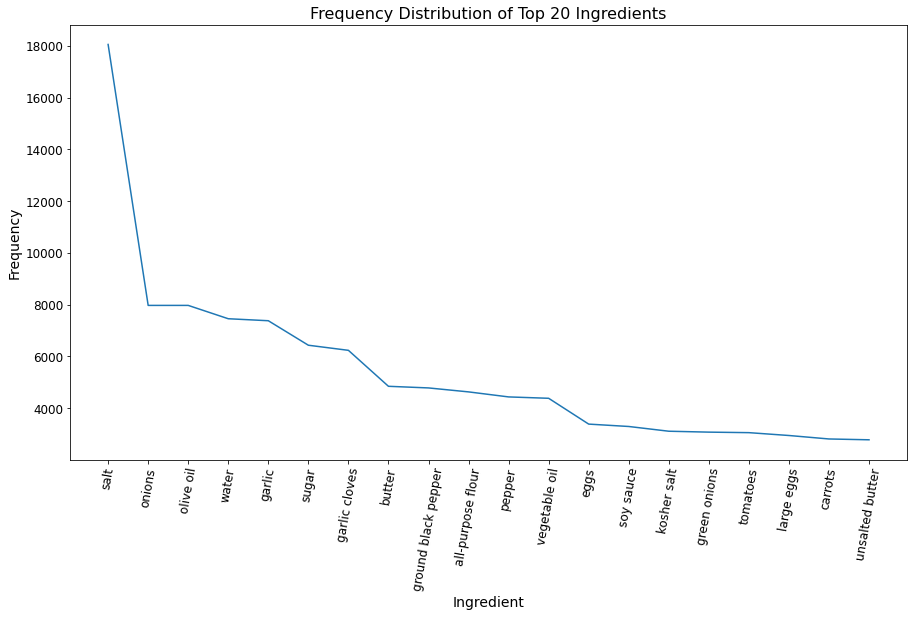

In [14]:
plt.figure(figsize=(15, 8))
plt.plot(igdDF.index[:20], igdDF['frequency'][:20])
plt.title('Frequency Distribution of Top 20 Ingredients', fontsize=16)
plt.xlabel('Ingredient', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12, rotation=80)
plt.yticks(fontsize=12)
plt.show()

#### Unique Cuisine Types



In [15]:
cuisineFreq = pd.DataFrame(trainDF['cuisine'].value_counts())
cuisineFreq.head()

,cuisine
italian,7838
mexican,6438
southern_us,4320
indian,3003
chinese,2673


Let's use a bar plot to visualise the frequency distribution.

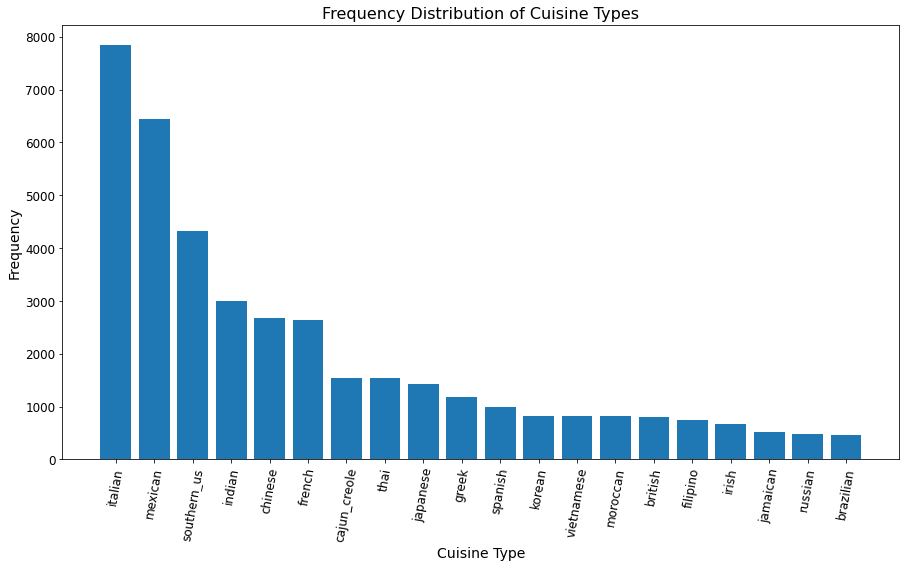

In [16]:
plt.figure(figsize=(15, 8))
plt.bar(cuisineFreq.index, cuisineFreq['cuisine'])
plt.title('Frequency Distribution of Cuisine Types', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12, rotation=80)
plt.yticks(fontsize=12)
plt.show()

We see that italian cuisine appears most frequently. Let's analyse its unique ingredients count.

#### Unique Ingredients for Italic Cuisine

In [17]:
italianDF = trainDF[trainDF['cuisine'] == 'italian']
italianDF.head()

,id,cuisine,ingredients
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo..."
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-..."
10,5875,italian,"[pimentos, sweet pepper, dried oregano, olive ..."
12,2698,italian,"[Italian parsley leaves, walnuts, hot red pepp..."
14,31908,italian,"[fresh parmesan cheese, butter, all-purpose fl..."


In [18]:
# Reset the dictionary count
for igd in igdDict:
  igdDict[igd] = 0

In [19]:
for i in range(len(italianDF)):
  igdList = italianDF['ingredients'].iloc[i]
  for igd in igdList:
    igdDict[igd] += 1

In [20]:
igdFreq = {'ingredient':[], 'frequency':[]}
for igd in igdDict:
  igdFreq['ingredient'].append(igd)
  igdFreq['frequency'].append(igdDict[igd])

In [21]:
igdDF = pd.DataFrame(igdFreq)
igdDF.set_index('ingredient', inplace=True)

# Drop the rows with 0 frequency and sort the values
igdDF = igdDF[igdDF['frequency'] > 0]
igdDF.sort_values(by=['frequency'], kind='mergesort', ascending=False, inplace=True)
igdDF

,frequency
ingredient,
salt,3454
olive oil,3111
garlic cloves,1619
grated parmesan cheese,1580
garlic,1471
...,...
turkey giblet stock,1
conchiglie,1
2% milk shredded mozzarella cheese,1


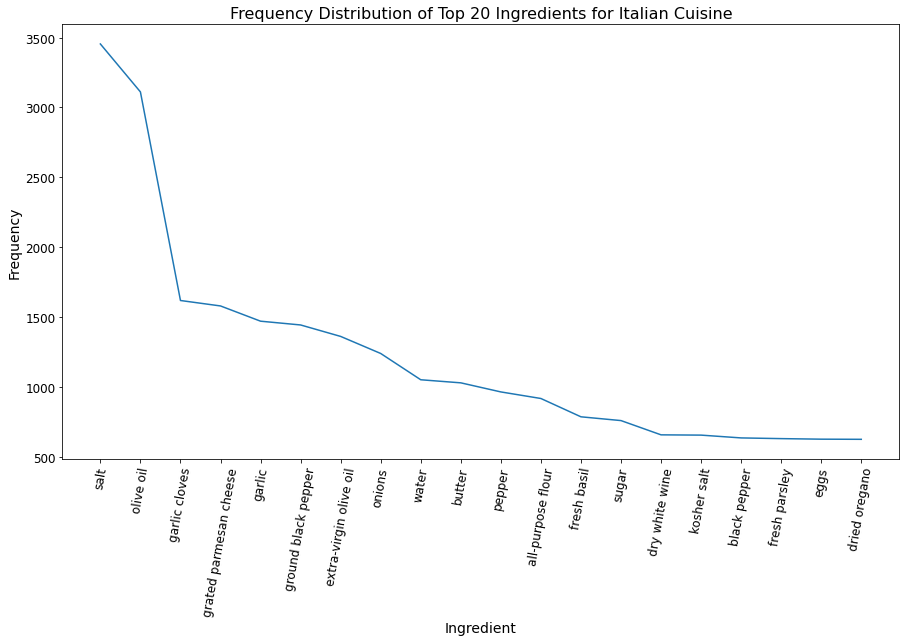

In [22]:
plt.figure(figsize=(15, 8))
plt.plot(igdDF.index[:20], igdDF['frequency'][:20])
plt.title('Frequency Distribution of Top 20 Ingredients for Italian Cuisine', fontsize=16)
plt.xlabel('Ingredient', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12, rotation=80)
plt.yticks(fontsize=12)
plt.show()

### Number of Cuisine Types for each Ingredient

For this part, we will use the igdNumDict and csnNumDict we obtained earlier to count the number of cuisine types in which each unique ingredient appears. For example, if 'romaine lettuce' appears in only italian and greek cuisines, the count will be 2. If an ingredient does not appear in any cuisine type, then we will not include it in the data.

In [23]:
# For each ingredient, assign a list of 20 elements (cuisines)
igdDict = dict()
for igd in igdNumDict:
  igdDict[igd] = [0 for i in range(20)]

In [24]:
# Main loop to count the number of different types for each ingredient
for i in range(len(trainDF)):
  igdList = trainDF['ingredients'].iloc[i]
  cuisineType = trainDF['cuisine'].iloc[i]
  for j in igdList:
    igdDict[j][csnNumDict[cuisineType]] += 1

In [25]:
# The dictionary for ingredients with the number by cuisine type
# print(igdDict)

In [26]:
# Count the number of distinct cuisine types for each ingredient
# If an ingredient does not appear in any cuisine, exclude it
igdCountByType = { 'Ingredient':[], 'Count':[] }
for igd in igdDict:
  count = 0
  for num in igdDict[igd]:
    if(num > 0):
      count += 1
  if(count > 0):
    igdCountByType['Ingredient'].append(igd)
    igdCountByType['Count'].append(count)

Let's display the top 20 ingredients by the number of different cuisine types they appear in.

In [27]:
igdByTypeDF = pd.DataFrame(igdCountByType)
igdByTypeDF.set_index('Ingredient', inplace=True)
igdByTypeDF.sort_values(by=['Count'], kind='mergesort', ascending=False, inplace=True)
igdByTypeDF.head()

,Count
Ingredient,
garlic,20
pepper,20
purple onion,20
seasoning,20
ground pepper,20


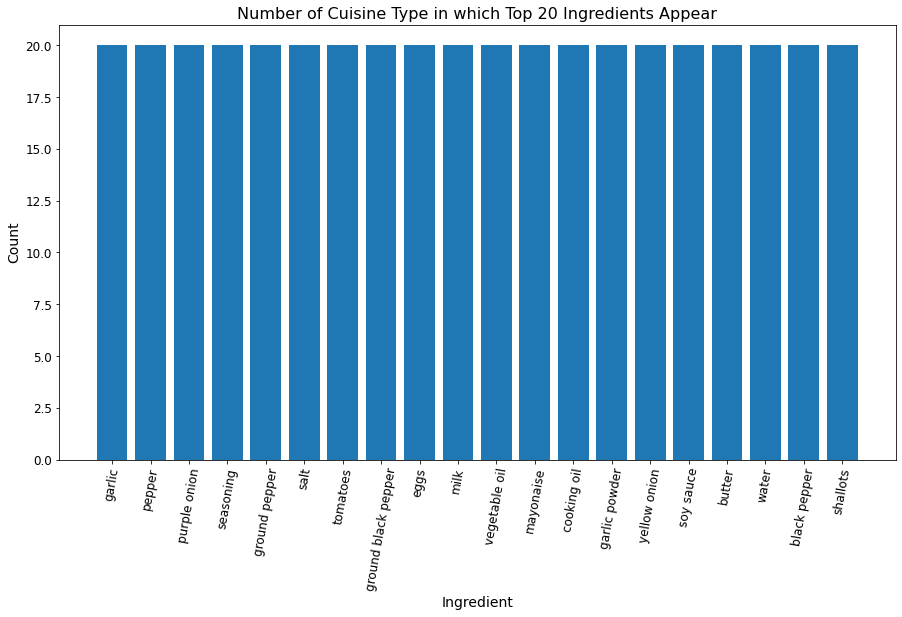

In [28]:
plt.figure(figsize=(15, 8))
plt.bar(igdByTypeDF.index[:20], igdByTypeDF['Count'][:20])
plt.title('Number of Cuisine Type in which Top 20 Ingredients Appear', fontsize=16)
plt.xlabel('Ingredient', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=80)
plt.yticks(fontsize=12)
plt.show()

Now, let's display the bottom 20.

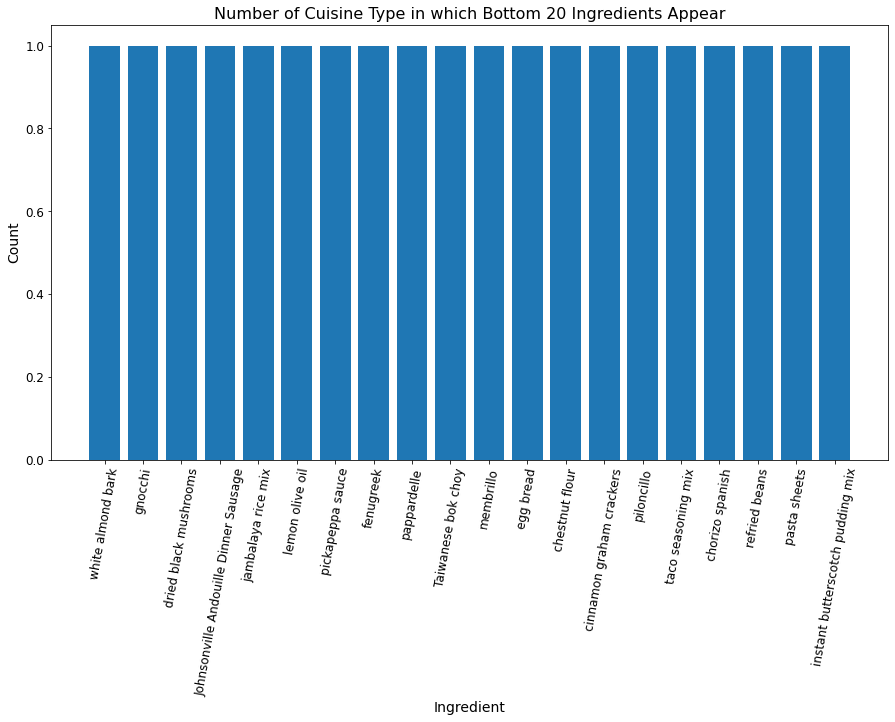

In [29]:
igdByTypeDF.sort_values(by=['Count'], kind='mergesort', ascending=True, inplace=True)
plt.figure(figsize=(15, 8))
plt.bar(igdByTypeDF.index[:20], igdByTypeDF['Count'][:20])
plt.title('Number of Cuisine Type in which Bottom 20 Ingredients Appear', fontsize=16)
plt.xlabel('Ingredient', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=80)
plt.yticks(fontsize=12)
plt.show()

### Number of Ingredients for each Cuisine Type

We will use the igdCountByType dictionary obtained to count the number of ingredients for each cuisine type.

In [30]:
# Count the number of distinct ingredients for each cuisine type
csnCountByIgd = { 'Cuisine Type':[i for i in csnNumDict.keys()], 'Count':[0 for i in range(20)] }
for igd in igdDict:
  for i in range(len(igdDict[igd])):
    if(igdDict[igd][i] > 0):
      csnCountByIgd['Count'][i] += 1

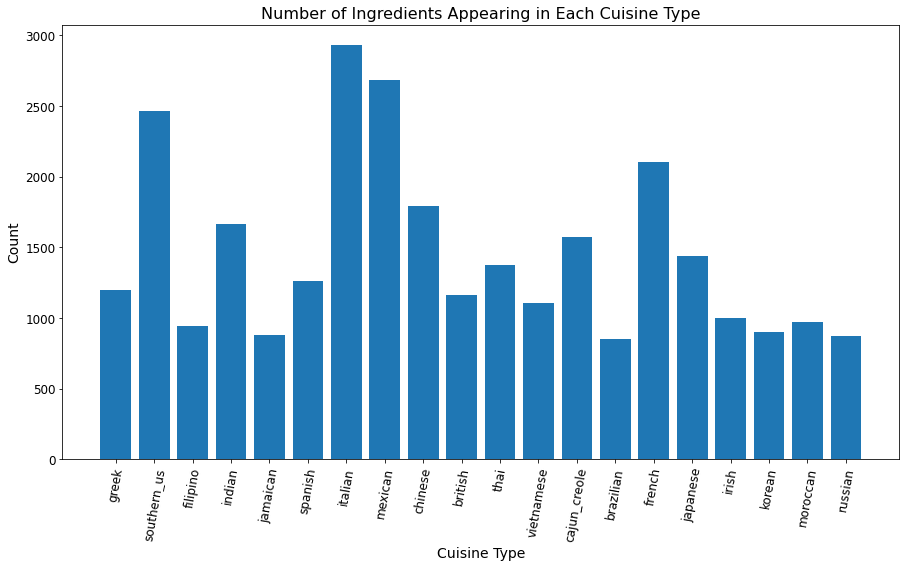

In [31]:
plt.figure(figsize=(15, 8))
plt.bar(csnCountByIgd['Cuisine Type'], csnCountByIgd['Count'])
plt.title('Number of Ingredients Appearing in Each Cuisine Type', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=80)
plt.yticks(fontsize=12)
plt.show()

From these insights, we will engineer the datasets through 2 different ways: (1) One-hot encoding and (2) Number of ingredients by cuisine type. We will do this in the 'Feature Engineering Section'.